# Euler-Maruyama

### 1. Comparison Numerical and Analytical Solutions

$$ dX(t) = \mu X(t) dt + \sigma X(t) dW(t) $$

$$ X(t) = X(0) exp \left[ \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma \int_0^t \delta W \right] $$

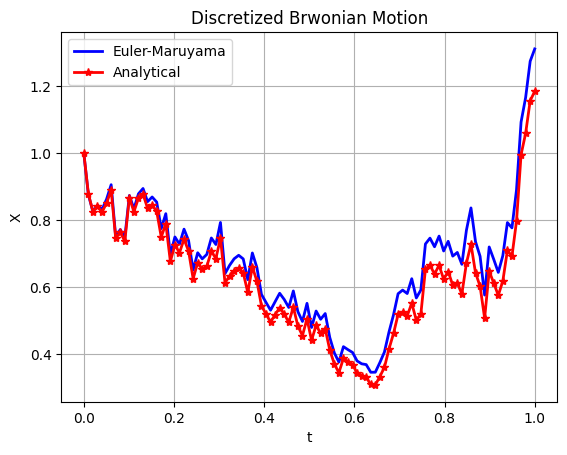

In [27]:
import numpy as np
import matplotlib.pyplot as plt

mu = 2
sigma = 1

X0 = 1

T = 1

N = 100
dt = T/N

Xa = np.zeros(N)
X = np.zeros(N)

Xa[0] = X0
X[0] = X0

dW = np.sqrt(dt) * np.random.randn(N-1)

for i in range(1, N):
    Xa[i] = Xa[i-1]*np.exp((mu - 0.5*sigma**2)*dt + sigma*dW[i-1])
    X[i] = X[i-1] + mu*X[i-1]*dt + sigma*X[i-1]*dW[i-1]

t = np.linspace(0, T, N)

plt.plot(t, X, 'b-', linewidth=2, label='Euler-Maruyama')
plt.plot(t, Xa, 'r-*', linewidth=2, label='Analytical')

plt.grid(True)
plt.title('Discretized Brwonian Motion')
plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.show()

### 2. Weak Convergence

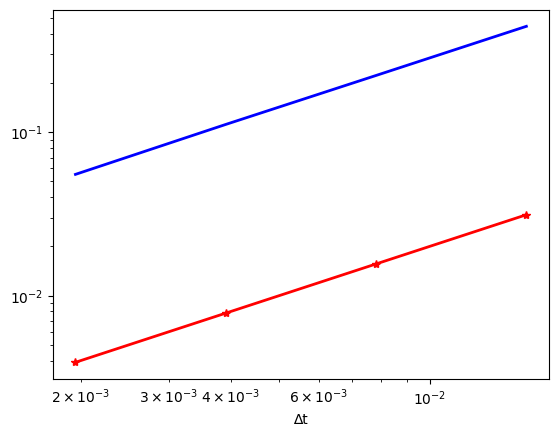

In [28]:
mu = 2.
sigma = 0.1

X0 = 1.

T = 1.

M = 5*10**4

Xm = np.zeros(4)
dT = np.zeros(4)

for p in range(1, 5):
    dt = 2**(p - 10)

    dT[p-1] = dt

    N = int(T/dt)

    X = X0 * np.ones(M)

    for i in range(1, N):
        W = np.sqrt(dt) * np.random.randn(M)
        X = X + dt*mu*X + sigma*X*W

    Xm[p-1] = np.mean(X)

Xerr = np.abs(Xm - np.exp(mu*T))

plt.loglog(dT, Xerr, 'b-', linewidth=2)
plt.loglog(dT, 2*dT, 'r-*', linewidth=2)
plt.xlabel("∆t")
plt.show()

### 3. Strong Convergence

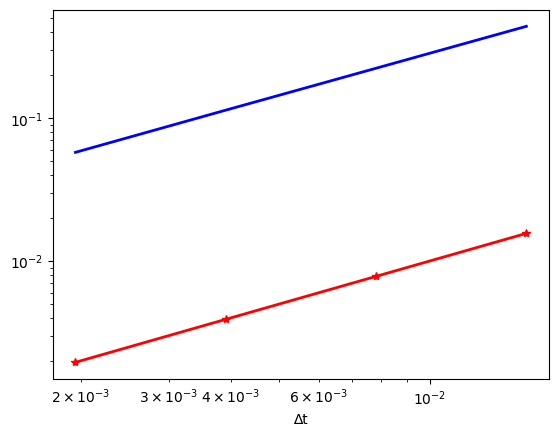

In [ ]:
mu = 2.
sigma = 0.1

X0 = 1.

T = 1.

M = 10**3

Xerr = np.zeros(4)
dT = np.zeros(4)

for p in range(1, 5):
    dt = 2**(p - 10)

    dT[p-1] = dt

    N = int(T/dt)

    X = X0 * np.ones(M)

    W = np.zeros(M)

    for i in range(1, N):
        dW = np.sqrt(dt) * np.random.randn(M)
        W = W + dW
        X = X + dt*mu*X + sigma*X*dW

    Xa = X0*np.exp((mu - 0.5*sigma**2)*T + sigma*W)

    Xerr[p-1] = np.mean(np.abs(X - Xa))

plt.loglog(dT, Xerr, 'b-', linewidth=2)
plt.loglog(dT, dT**0.5, 'r-*', linewidth=2)
plt.xlabel("∆t")
plt.show()